# Kafka - Python - MongoDB 
## Twitter API Sentiment Analysis 

# Consumer Notebook

In this Notebook, we will initialize Kafka Client and then our __consumer__ that __subscribes__ to our __producer (publisher)__ in our topic.

In [1]:
# Necessary Imports 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import string
import sys
import tweepy # for twitter 

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

In [2]:
#  Importing Libraries - Important NLP downloads 

import nltk
# Download the rule-based sentiment score lexicon(polarity score/word)
#nltk.download('vader_lexicon') 
# Download the english stopwords set
#nltk.download('stopwords') 
# Wordnet lexical database of semantic relations between words in more than 200 languages
#nltk.download('wordnet')

In [3]:
# The rule-based sentiment classification approach using vader
# Note: for more details about the vader project --> https://github.com/cjhutto/vaderSentiment

# let's check the the stored words scores , and see how polar are they
sentiment_analyzer = SentimentIntensityAnalyzer()
word_scores = sentiment_analyzer.lexicon

In [4]:
from pykafka import KafkaClient 
client = KafkaClient(hosts="localhost:9092") #initialize KafkaClient

In [5]:
# to access the topic we will use this command to access the topic by its name we created earlier
topic = client.topics['accidents']


In [6]:

# Creating a consumer 
consumer = topic.get_simple_consumer()
# saving tweet txt in a list 
tweet_text = []

n_tweets = int(input ("Please enter how many tweets to analyze: "))

# we will now use a simple loop to get all the values one by one
for message in consumer:
    if message is not None:
        # add tweet text to the list for further analysis 
        tweet_text.append(message.value)
        
        print (message.offset, message.value)
        # set a condition to stop the consumer and the producer
        if len(tweet_text) == n_tweets:
            consumer.stop()
            
            
            

Please enter how many tweets to analyze: 5000
0 b"@AlexandrosMarinos makes a lawyerly point here: Investigate, by all means, but don't leap screaming into the twitter-void based on a piece of evidence that proves nothing. https://t.co/D1viiy4qWu"
1 b"@TESLA_k1 @bscwhalegems @Companion_to I'm surprised that this person was able to bring in over $100K using this method, yet it's not widely known within the cryptocurrency world. https://t.co/HmvUpH96TT"
2 b'@ananavarro These \xe2\x80\x9cPawns\xe2\x80\x9d have already been moved by the other team two spaces into our country illegally.  Another move has to be made or consequence is inevitably defeat.  Open your eyes.  Close the gates and fix the country from within first.  Then reopen the border.'
3 b'RT @seandilleyNEWS: A man on a bike just SNATCHED and stole my iPhone from my hand  wrong blind person  wrong day  Jumped on him, safely de\xe2\x80\xa6'
4 b'@spectatorindex Closer to real value'
5 b'\xe2\x9e\xa0Weather Information #weatherhava

1079 b'RT @ShiriSpear: Did you know January is typically our coldest month in #Boston and #NewEngland? We\xe2\x80\x99re set to ring in the new year/month wit\xe2\x80\xa6'
1080 b'RT @Plan_D_: As inconvenient as it might be, I\xe2\x80\x99m never trippin on delaying or cancelling a flight due to bad weather I don\xe2\x80\x99t even play like\xe2\x80\xa6'
1081 b'RT @truth_tesla: @BrianGitt \xe2\x96\xaa\xef\xb8\x8f\xf0\x9d\x97\x99\xf0\x9d\x97\xae\xf0\x9d\x97\xb0\xf0\x9d\x98\x81 \xf0\x9d\x97\xb0\xf0\x9d\x97\xb5\xf0\x9d\x97\xb2\xf0\x9d\x97\xb0\xf0\x9d\x97\xb8: WSJ claim that Teslas charge \xe2\x80\x9c3x\xe2\x80\x9d longer in cold weather &amp; lose \xe2\x80\x9c54%\xe2\x80\x9d of range is false, rated 5\xe2\x80\xa6'
1082 b'@TheMaverickWS @SouthwestAir The weather countrywide has played havoc on travel plans and taken over 50 lives.  Hope you can chill with your family a bit longer until things get better.'
1083 b'RT @nymetrowx: Tuesday\xe2\x80\x99s Weather Rating: 3/10\n\nThe sun is still tryin

1131 b'@ArticleCruncher @FoxNews so, the weather cooperated with the reenactment.'
1132 b'Weather update for South West Surrey:- Temperature is 10.8 C, Air Pressure is 1012.3hPa at  12:20:04 on the 27/12/2022'
1133 b"RT @Koreaboo: BTS's Jungkook Makes ARMYs Lose Control While Being A True Pro Despite Qatar's Hot Weather https://t.co/xiNqHDtlkP"
1134 b'@llouiiee29 It got to 41c here today xx'
1135 b'RT @VarunKrRana: Just saw a donkey on road, he was looking so comfortable in such a cold weather despite not wearing even a t-shirt.\n\nHope\xe2\x80\xa6'
1136 b'RT @ryejigallery: ryeji sharing one blanket under the cold weather \xf0\x9f\xa5\xba https://t.co/2ilQlK8rtf'
1137 b'Weather update for today\nWe have a huge storm with a lot of rain with gloomy skies and strong wind \xf0\x9f\xa4\x94\xf0\x9f\x98\x82\n#TrueInsiderxLoveinTheAir'
1138 b'this cold weather is NOT IT bro \xf0\x9f\x98\xaa'
1139 b'RT @Lyndonx: @UNGeneva @GretaThunberg Never read or heard so much rubbish in my life. Show me th

1185 b'@AriaJaneltv YES YES, golfing weather'
1186 b'RT @Plan_D_: As inconvenient as it might be, I\xe2\x80\x99m never trippin on delaying or cancelling a flight due to bad weather I don\xe2\x80\x99t even play like\xe2\x80\xa6'
1187 b'RT @stillunwoke17: @PressSec Why isn\xe2\x80\x99t New York prepared to handle winter weather?'
1188 b'@m_damsky @USDOT They claim weather when other airlines are flying the same route to get out of paying for things like hotel or meals.'
1189 b'RT @ericgarland: National Weather Service has reported 100% chance of Snowflakes\n\xf0\x9f\x99\x82 https://t.co/joaMDYWi6T'
1190 b'RT @Sujodamystique: These are the animals who will come on here and tweet about how their parents, teachers and society as a whole is toxic\xe2\x80\xa6'
1191 b'Hate this weather'
1192 b'@NHS111Wales Please do not attend our A&amp;E departments unless it is a genuine emergency. This will allow those who really need urgent care and treatment to be seen more quickly. Thank you for your sup

1241 b'Southwest cancels thousands more U.S. flights as weather stays bitter - https://t.co/jxLNRAipel'
1242 b"@USDOT The DOT should know that Southwest is claiming weather as the reasons for cancellation so that they do not have to honor their service plans. The storms were days ago and they're still telling passengers this lie to evade their responsibilities."
1243 b'Why is it still snowing is the question? At this point, somebody clearly broke the weather machine.'
1244 b'Look for cool yet sunny conditions across SE Texas today with highs largely in the 50s. Lows for tonight will range from the lower 30s to upper 40s with even warmer weather set to arrive later this week. #TXwx #HOUwx #GLSwx #BCSwx https://t.co/Eg7yiP9TOW'
1245 b'RT @ananavarro: Don\xe2\x80\x99t lecture me about a made-up \xe2\x80\x9cWar on Christmas\xe2\x80\x9d, or tell me \xe2\x80\x9cChrist is the Reason for the Season\xe2\x80\x9d, if you support stagi\xe2\x80\xa6'
1246 b'Cedar Rapids Iowa Current Weather: 12/27/2

1292 b'@theastralband @kingtuts Was this the one where the tambourine was smashed off the ceiling?'
1293 b'@JNJNews Dec 28 #weather related #health ( #Migraine, #Headache, #Pain and #Mood ) risk. https://t.co/v87krfpnYs'
1294 b'@carolynharris24 @BlaenauGwentMP @GeraldJonesLAB @jessicamordenmp It\xe2\x80\x99s been outrageous -items sent well in advance of Xmas have still not arrived. They blame everyone else (Royal Mail, weather, sickness) but refuse to take responsibility for the ONE job they have been paid to do\xe2\x80\xa6 xmas was ruined by the ineptitude of #evri'
1295 b'I will get home today. Breakdowns and bad weather doing their best to stop me though.'
1296 b'RT @ruthschmidt: .@SouthwestAir your solo desk agent worked 16 hours, was asked to keep working because of canceled flights. They broke dow\xe2\x80\xa6'
1297 b'Porthmadog Wind Force less than 3 on the Beaufort scale https://t.co/MXXJhFeur4\n2022-12-27 12:21 pm'
1298 b"RT @Mysteron1959: @JailbaitTV1 According to BBC Weather

1344 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
1345 b'@Merck Dec 28 #weather related #health ( #Migraine, #Headache, #Pain and #Mood ) risk. https://t.co/v87krfpnYs'
1346 b'leisure travel in a pandemic is a fucking joke.'
1347 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
1348 b'If you are working in #MedEd, please do all you can to stay safe and help others. \n\nBut also use this for teaching so our future doctors can be better prepared for events such as these (adaptation), and realize the importance of mitigation where they can: https://t.co/kACGHkDtHY'
1349 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
1

1399 b'Intensify your resistance against Satan\xe2\x80\x99s weather warfare agenda that is wreaking havoc upon so many nations of your earth God, get more awareness of that treachery to emerge among more people. #GeoEngineering #ClimateScam #GodIsGood #JesusIsLord #WeatherWarfare #Chemtrails https://t.co/E3IUREgSnN'
1400 b'A startup called Make Sunsets has launched weather balloons in Mexico that release sulfur particles into the stratosphere to reflect more sunlight back into space. While the technique could theoretically ease global warming, it also has unknown, potentially dangerous side effects'
1401 b'tfw you start the day cleaning dog poop \xf0\x9f\x98\xad idk why django pooped inside the house, he almost never does that\xe2\x80\xa6 maybe he just didn\xe2\x80\x99t want to go outside because of the rainy weather\xe2\x80\xa6'
1402 b'Regina SK Weather, Temp:-1.7\xc2\xbaC; Dew:-9.6\xc2\xbaC; Pressure:996.40hPa.; Wind:0/kph@254.0; Humdity:55   https://t.co/6Ptyl5RMRM https://t.co/vfZc

1448 b"@DrEliDavid Stop blaming the COVID vaccines,\nIt's 100% climate change\nOne min it's cold\nOne min it's warm or hot.\nI thought this type of weather was normal I admit I was https://t.co/b2FRqIHVMM"
1449 b"RT @AlexEpstein: \xe2\x80\x9cwe know that we can produce reliable electricity with fossil fuels because we've been doing it for generations and we've\xe2\x80\xa6"
1450 b"@Swiftie01 How can he remember?  He didn't grow up in Canada. Another import"
1451 b'RT @ProffesorPubli1: @PeterDClack @RealJessRussell Explanations for what "Climate Change" does are as variable as the weather.\nBut the solu\xe2\x80\xa6'
1452 b'@511ONWest Does this mean 21 is open now? What does \xe2\x80\x9ccleared\xe2\x80\x99 mean in your tweet?'
1453 b'@MigraineRelieff Dec 28 #weather related #health ( #Migraine, #Headache, #Pain and #Mood ) risk. https://t.co/v87krfpnYs'
1454 b'Braving the double dangers of cold wet weather and filthy tube seats. https://t.co/lDIBH04yJH'
1455 b'The weather app shows it sno

1496 b'@GBNEWS Thank you Nathan Rao for so clearly explaining the current weather patterns in such a charismatic and informative manner. \nHope we see more of you  on GBNews\xe2\x80\x99The People\xe2\x80\x99s channel.'
1497 b'ONLY 3 DAYS TO GO until the Bacardi Best Day Ever !\xf0\x9f\x90\xac\xf0\x9f\x8d\xb9Weather forecast 100% good times, ice-cold drinks and smoking hot jams. Grab your slips it\xe2\x80\x99s going down \xf0\x9f\xa9\xb4\xf0\x9f\x8d\xb9\n\n\xf0\x9f\x8e\xab : https://t.co/w3X7jWqrXp https://t.co/tCzBGPAeqV'
1498 b'@Miiapup GIMME THAT WARM WEATHER PLEASE'
1499 b'Cedar Rapids Iowa Current Weather: 12/27/2022 @ 06:23 AM 3.7F Humidity: 86% Wind: 4.7 SSW #wdisplay #iawx #criawx'
1500 b"RT @SHJniverse: \xf0\x9f\x8d\x8b: I guess they called me rabbit because of my big eyes\n\xf0\x9f\x8d\x8b: Now I've to go and eat~\n\xf0\x9f\x8d\x8b: I haven't decided what to eat yet\n\xf0\x9f\x8d\x8b:\xe2\x80\xa6"
1501 b'RT @ruthschmidt: .@SouthwestAir your solo desk agent worked 16 hours, was

1547 b'@EricGarcia1 I don\'t think anyone is laughing, but it really only makes sense. Texas has not established itself with "sanctuary cities" that have allocated funding and resources devoted to helping these people. Washington, DC has repeatedly advertised itself as a sanctuary city.'
1548 b'Shit weather for photography but Log King got fed at least https://t.co/jzPEDMfSAf'
1549 b'RT @Miss_Bano17: TAHAJJUD!\nTAHAJJUD is such a miracle that if we come to know about its reward in duniya and Akhirah, we will never find ou\xe2\x80\xa6'
1550 b"@ChrisMurphyCT Why oh why doesn't Biden finish the Wall and secure our borders?"
1551 b'RT @aggie_panda: i need yall to stop being shocked airlines are breaking down. a) weather is trying to tell you to stay the fuck home and b\xe2\x80\xa6'
1552 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
1553 b'@NdanuLumbi Weather for TW

1599 b'RT @sonic_hedgehog: Cold weather checklist: https://t.co/3Mlmh8EWDK'
1600 b"RT @EricGarcia1: So many right wingers laughing at all the migrants to Kamla Harris' house in the freezing weather. Those migrants are peop\xe2\x80\xa6"
1601 b'RT @BEljably: #\xe6\xa3\x8b\xe7\x89\x8c share in holding them steady through stormy weather.   #\xe7\x82\xb8\xe9\x87\x91\xe8\x8a\xb1  https://t.co/NVv9JwPZ9r'
1602 b'RT @ericgarland: National Weather Service has reported 100% chance of Snowflakes\n\xf0\x9f\x99\x82 https://t.co/joaMDYWi6T'
1603 b'@Jf98523925 @NOELreports Here in Europe we have something called seasons. Each season has different weather conditions causing changes in landscape.'
1604 b'@USDOT @SouthwestAir was terrible before this debacle. Canceled my flight this summer due to \xe2\x80\x9cweather\xe2\x80\x9d. It was the nicest day outside that day in Denver. Offered to rebook us three days later. They did not pay for hotel, due to weather related cancellation.'
1605 b'RT @groupfazza:

1646 b'RT @Rainy__Weather: Wore my Kobe Grinch shoes all weekend and today. \xf0\x9f\x98\xad\xf0\x9f\x92\x9c#KobeBryant #mambaforever https://t.co/QJyZp4987b'
1647 b'RT @NoTeamsIndy: "The two migrants started their journey in a small, Middle Eastern town called Bethlehem, which is known for unrest and re\xe2\x80\xa6'
1648 b'RT @AKnightsSports: \xf0\x9f\x8f\x80LADY KNIGHTS BASKETBALL\n\n\xe2\x9d\x97\xef\xb8\x8fThe Randolph Holiday Classic has been moved to Madison County HS. \n\nBecause of weather and\xe2\x80\xa6'
1649 b'@ClimatePsych Calm down love.'
1650 b"@Michael84768518 @ExtinctionR Nobody is saying that. But the frequency &amp; intensity of of 'events' is a result of adding energy to the atmosphere. This much we know and understand"
1651 b'As crazy as it sounds, this weather makes me want to get a cabin in the woods for a vacation home'
1652 b'@rumatoidarthrit Dec 28 #weather related #health ( #Migraine, #Headache, #Pain and #Mood ) risk. https://t.co/v87krfpnYs'
1653 b"@Markysix 

1702 b"Save this. They'll need it for @GovKathyHochul's trial. https://t.co/COCOuNhYjo"
1703 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
1704 b'RT @PolReader: @Ezinger44 @SecretaryPete A month ago, when T\xe2\x80\x99giving travel on airlines went smoothly, Secretary Buttigieg warned about conc\xe2\x80\xa6'
1705 b"RT @ESKALINO: \xe3\x85\xa4\xe3\x85\xa4\n\xe3\x85\xa4\xe3\x85\xa4\xe3\x85\xa4\xe3\x85\xa4 #\xe2\x83\x9dLEEKNOWTIME\n\xe3\x85\xa4\xe3\x85\xa4\xe3\x85\xa4\xe3\x85\xa4\xe3\x85\xa4\xe3\x85\xa4 \nEven in this chilly weather, STAY's love helps us feel warm and happy. Thank you for spending C\xe2\x80\xa6"
1706 b"RT @KeithNMiles: @CTVNews To the 20 year olds who haven't seen a significant snowstorm, everything is 'climate change'. \n\nTo adults who hav\xe2\x80\xa6"
1707 b"RT @QuoteDigging: @TurnTexas_Blue While people in Texas sit in the dark in freezing weat

1757 b'RT @hausfath: A sad example of how a lie will fly around the whole world while the truth is getting its boots on.\n\nWhat this graph really s\xe2\x80\xa6'
1758 b'More posts like this please. We were warned. A week on advance. Weather forecasts used words like paralyzing and destructive. They said \xe2\x80\x9conce in a century storm.\xe2\x80\x9d We as the people, had PLENTY of warning for how bad this was going to be\xe2\x80\xa6 and not with just a days notice. https://t.co/CJMsqufrR0'
1759 b'RT @DailyLoud: Jim Jones is not happy with the weather in New York\xe2\x80\xbc\xef\xb8\x8f\xf0\x9f\xa4\xa3 https://t.co/IR9UQJHgSp'
1760 b'Severe Hailstorm Hits Assam, Over 200 Houses Damaged\n\nhttps://t.co/gzOIYgNpMO \n#assam_hailstorm #Assam_weather #hailstorm_in_assam #Breaking_News #Featured #Politics\n\nhttps://t.co/gzOIYgNpMO'
1761 b'@Rob_on_sisukas Good morning. Can we use your video in our syndicated news coverage? Did you take this video and have rights to give us permission? \nWHE

1809 b'BUF issues A BAND OF HEAVY SNOW WILL AFFECT PARTS OF JEFFERSON, OSWEGO, AND LEWIS COUNTIES till 8:45 AM EST https://t.co/mFZ1RKSyxk'
1810 b'@mototingle Watch the Gold Star review......   I did laugh\xf0\x9f\x98\x85\xf0\x9f\xa4\xa3\xf0\x9f\x98\x85\xf0\x9f\xa4\xa3\xf0\x9f\x98\x85  thank you for your honesty,  all well made points\xf0\x9f\x91\x8d'
1811 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
1812 b'@Cassand62960032 No need. Our National TV stations talk about them in every edition of the news, lunchtime and evening. Right before the weather.'
1813 b'RT @yonkojohn: @CTVNews Adverse weather is the prime opportunity to waltz out the Climate Change banner with hopes of collecting more taxes\xe2\x80\xa6'
1814 b'Atp gonna start wearing t-shirts'
1815 b'RT @ZeezerLeo: SOB NONE of us want this toxic \xf0\x9f\x92\xa9sprayed on us. They\xe2\x80\x99ve weaponized

1859 b'Cedar Rapids Iowa Current Weather: 12/27/2022 @ 06:26 AM 3.7F Humidity: 86% Wind: 5.6 S #wdisplay #iawx #criawx'
1860 b"Good Tuesday morning!  Cold &amp; a bit frosty early on, then mostly sunny &amp; getting warmer.  Temps top out in the upper 50's today...then drop into the low 30's with frost tonight.  Warmer temps expected the rest of the week.  https://t.co/p4BJeMN606 https://t.co/C7Gf6fRhBh"
1861 b'@ACCinTouch Dec 28 #weather related #health ( #Migraine, #Headache, #Pain and #Mood ) risk. https://t.co/v87krfpVO0'
1862 b'Don\xe2\x80\x99t miss out taking a walk in this beautiful weather \xf0\x9f\x8d\x83'
1863 b'RT @ericgarland: National Weather Service has reported 100% chance of Snowflakes\n\xf0\x9f\x99\x82 https://t.co/joaMDYWi6T'
1864 b'RT @VarunKrRana: Just saw a donkey on road, he was looking so comfortable in such a cold weather despite not wearing even a t-shirt.\n\nHope\xe2\x80\xa6'
1865 b'@StormHour @lhedien Why am I seeing this three days in on my timeline...'
1866

1910 b"@janineglee @ruthschmidt @SouthwestAir Because so many people can afford to lose the cost of airline tickets and schedule time off flexibly at other times of the year. Since, you know, obviously no one booked flights months in advance and requested time off and knew there'd be a major storm."
1911 b"RT @AmateurRosa: Can someone take me back to the sun please, I don't like this cold weather \xf0\x9f\xa5\xb6\xf0\x9f\xa5\xb6 https://t.co/P7OUAfAvQU"
1912 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
1913 b'RT @hausfath: A sad example of how a lie will fly around the whole world while the truth is getting its boots on.\n\nWhat this graph really s\xe2\x80\xa6'
1914 b'(1) New York, Boston, DC, and Vermont are cold and have among the highest homelessness rates in the country. \n\n(2) San Francisco/California\xe2\x80\x99s homelessness crisis began in the late 19

1961 b'RT @coldenvy: @captainarve @elonmusk @aelluswamy We get similar weather here in Calgary Alberta since we live close to the Rocky mountains\xe2\x80\xa6'
1962 b'Tv \xf0\x9f\x93\xba \n&amp;\nTea \xf0\x9f\xab\x96 \nWeather https://t.co/h5eHHnI0Ef'
1963 b'RT @VarunKrRana: Just saw a donkey on road, he was looking so comfortable in such a cold weather despite not wearing even a t-shirt.\n\nHope\xe2\x80\xa6'
1964 b'RT @weather_buffalo: A picture from cheektowaga that describes this storm perfectly. https://t.co/MQEGupkOjy'
1965 b'The destruction of humankind on earth is not a pipe dream!\n\n\xe2\x9a\xa0\xef\xb8\x8fLarge-scale and frequent occurrence of natural disasters due to abnormal weather\n\xe2\x9a\xa0\xef\xb8\x8f Melting permafrost and glaciers\n\xe2\x9a\xa0\xef\xb8\x8fGlobal Warming/Hot House Earth\n\xe2\x9a\xa0\xef\xb8\x8fMarine and Air Pollution by Microplastics\n\n@tree932174 https://t.co/LX2bzEj9AB'
1966 b'Hii weather ya leo inataka friends who can keep secrets.'
1967 b"RT @

2017 b'Weather disruptions linger for U.S. flights, led by Southwest Airlines https://t.co/ecLd0ouXvD'
2018 b'RT @RealFlokiInu: #Valhalla has clear weather and some.. interesting mist forecasted. https://t.co/UhxKigaTTL'
2019 b'RT @Jamesfo60309365: @WGRZ like this was the only blizzard buffalo has ever had in the last 200 years , how about the mayor and governor  w\xe2\x80\xa6'
2020 b'Plastic straws aren\xe2\x80\x99t essential, but how much carbon does the PM\xe2\x80\x99s unnecessary Jamaican vacation create? Wouldn\xe2\x80\x99t a true carbon hero stay home? I hear Zoom vacations are very life-like. https://t.co/nI6sxJWiW5'
2021 b'As an alternative to leaving outdoor faucets dripping as a means to prevent pipes and faucets from freezing, water customers should consider installing insulated covers that protect these fixtures during extremely cold weather.\nhttps://t.co/ML9GMgI9gy'
2022 b'@WGRZ It\xe2\x80\x99s called weather. It\xe2\x80\x99s been happening since the beginning of time.'
2

2067 b'RT @ryejigallery: ryeji sharing one blanket under the cold weather \xf0\x9f\xa5\xba https://t.co/2ilQlK8rtf'
2068 b'RT @UAENews: Dubai hit by heavy rain as UAE weather alert is issued https://t.co/nAIYljoRXu https://t.co/zo3ps6YoeL'
2069 b'@aunarisk @realVicTorres02 @SCSsoftware @VolvoTrucks @VolvoGroup you can find the wintermod here:\n\nThe wintermod:\nhttps://t.co/bCPpmzZuLn'
2070 b'@TheLeoTerrell I was told the planet is heating up.  Lordy it will interest how the climate scammers spin this one'
2071 b'RT @MHS_Stats: @VicLombardi @SouthwestAir Rebook on United. Everywhere that Southwest flies to from Denver United does too and with more fr\xe2\x80\xa6'
2072 b'RT @StarSeed_2020: Tesla Refuses to Charge in 19 Degree Weather Leaving Man Stranded on Christmas Eve\n\nhttps://t.co/RHXDhtlX37\n\n@ChiefNerd'
2073 b'@kellyinvegas @BSSportsbook Was just in St John, weather was perfect. Enjoy!'
2074 b'RT @sonic_hedgehog: Cold weather checklist: https://t.co/3Mlmh8EWDK'
2075 b'@harryjsi

2119 b'@Highland1011 @thehill It\xe2\x80\x99s 30 degrees in El Paso.  Is it more humane that they sleep outside at the border, in order to appease democrats?'
2120 b"@fordsandersTV I will never understand the mentality of people mad they can't get on a plane during bad weather and potentially be injured or die. Then they throw a fit at the one person trying to save their life."
2121 b'@AGlensMan I know what you mean but as someone who has been involved in winter maintenance I cut them some slack. Road salt is not effective below -5c. I used to be manager of a weel kent crossing between Fife and Dundee and we used a deicing fluid - worked to -35c but was \xc2\xa31k per tonne'
2122 b'No thanks! I\xe2\x80\x99ll be putting gas in my cars forever and ever, amen. https://t.co/TlCjjUGfZB'
2123 b'Bangalore has a monopoly over sexy weather. \n#bangaloreweather'
2124 b'For that matter, who ever joined d yatra d dogs, d pigs... none wore even a T-shirt... except d one for distinction. https://t.c

2170 b"@EricGarcia1 Really another bleeding heart liberal Democrat when? Why don't you open your doors and let them into your house? Let them eat your food. Let them sleep in your bed. Put your money where your mouth is cuz you got a big mouth. You're all talking. No action I see"
2171 b'RT @raphousetv2: Even Squirrels Not Safe In this Weather!Rip he froze to death\xf0\x9f\x95\x8a\xef\xb8\x8f\xf0\x9f\x90\xbf\xef\xb8\x8f\xf0\x9f\xa5\xb6 https://t.co/Uwt2gG8aFb'
2172 b'5096 Weather Data 10:55 PM 33.7\xc2\xb0C 36% 5.7km/h SW   0.0mm https://t.co/wofi3fQJLB'
2173 b'RT @nahigda: Ah, the weather is lovely and warm. Things are about to start getting lively again. \xe2\x80\x94 Nahida.\n\n[ #kamday #kameraday #genshintw\xe2\x80\xa6'
2174 b'RT @StormHour: Aurora over Coldfoot in Alaska by Laura Hedien @lhedien \n\nFrom Weather Photo Of The Week 15th March 2021 \xf0\x9f\x91\xbd https://t.co/Y4bi\xe2\x80\xa6'
2175 b"RT @EricGarcia1: So many right wingers laughing at all the migrants to Kamla Harri

2224 b'RT @Dimpho_Mokwala: What is HAARP and why are we experiencing such a dizzy weather with floods ? \n\nClimate change is a hoax ! https://t.co/\xe2\x80\xa6'
2225 b'this weather &amp; stroll &lt;3'
2226 b'RT @VABVOX: #GoodMorning to everyone who knows dropping migrants on a sidewalk in sub-freezing weather with no food, water, shelter, coats\xe2\x80\xa6'
2227 b'@phdinsd @10NewsAcevedo @10News Good thing you\xe2\x80\x99re former\xe2\x80\xa6I can imagine the attitude when folks are stranded and inconvenienced'
2228 b'@GirlGiada Good heavens! Does Murdoch own the TV stations in Italy!'
2229 b'Don Jr., on his absence the day his dad announced a 3rd run;\n\nhe\xe2\x80\x99d been "caught in bad weather on a hunting trip"...\n\nTranslation; he got "snowed under" the last time he scored \xf0\x9f\x91\x87\xf0\x9f\x98\x9c https://t.co/JiWjVc2ASc'
2230 b'Caye Caulker, Belize weather AM Clouds/PM Sun today! With a high of 79F and a low of 72F. #cayecaulker #weather #travel'
2231 b'this why i\xe2

2277 b'Man I think we got a phone charger last year. Still a great bowl though \xf0\x9f\xa4\xa3 https://t.co/FBgBRAltFt'
2278 b'@thejellyfishfur @GraceWhiteKHOU @SouthwestAir @KHOU Those employees should feel ashamed. They ruined so much for so many people this Christmas.'
2279 b"RT @Tribble_Bait: @GeraldoRivera In this kind of weather, I don't think much of it, either. The sad thing is that nothing seems to move the\xe2\x80\xa6"
2280 b'RT @ericgarland: National Weather Service has reported 100% chance of Snowflakes\n\xf0\x9f\x99\x82 https://t.co/joaMDYWi6T'
2281 b'@sgoewey @MikeSington Wow. Fuck OUR homeless though. S T F U'
2282 b'RT @sonic_hedgehog: Cold weather checklist: https://t.co/3Mlmh8EWDK'
2283 b'RT @roymusclemaster: Hope everyone is enjoying this weather as much as me \xf0\x9f\x94\xa5 https://t.co/OosxDxbNly'
2284 b'Hot weather...\xe2\x9b\x85\nUpar se me b hot\xf0\x9f\x98\x89\xf0\x9f\x98\x9d'
2285 b'@kennycargill @EricGarcia1 What would Jesus do?'
2286 b"RT @EricGarcia1: So

2332 b'Watch: Oklahoma firefighters rescue dog stuck in frozen lake https://t.co/03PmqnXbgQ #FoxWeather'
2333 b'Weather 12:30 PM 9.1oC 1017.9 mb 4.0 mph W'
2334 b'RT @ruthschmidt: .@SouthwestAir your solo desk agent worked 16 hours, was asked to keep working because of canceled flights. They broke dow\xe2\x80\xa6'
2335 b'RT @harryjsisson: Greg Abbott abandoned kids on the side of the road in 13 degree weather on Christmas Eve. \n\nSo much for being pro-life.'
2336 b'RT @rishidarda: I have stayed in Cleveland, USA for years. Weather in winter included strong winds and continuous snowfall. If this jacket\xe2\x80\xa6'
2337 b'RT @ruthschmidt: .@SouthwestAir your solo desk agent worked 16 hours, was asked to keep working because of canceled flights. They broke dow\xe2\x80\xa6'
2338 b'The weather today is amazing\xf0\x9f\x98\x8d\xf0\x9f\x98\x8d\xf0\x9f\x98\x8d\xf0\x9f\x98\x8d https://t.co/CGM7ebrnKG'
2339 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charg

2382 b'RT @nudetoks: The good weather made me happy \xf0\x9f\x98\x98 Waiting for you babe\n\nCreate a Free account to have a chat here and tell us what you want to\xe2\x80\xa6'
2383 b"RT @kibettnick: The weather is favouring us farmers \nLet's go to the farm \nCabbage F1 ready in 1 week https://t.co/PQbnsFiJts"
2384 b'@SouthwestAir so the \xf0\x9f\x90\x88\xe2\x80\x8d\xe2\xac\x9b is out the \xf0\x9f\x92\xbc now. This isn\xe2\x80\x99t weather; your IT is outdated. Will you reimburse me for the 3-4 days of hotel and meal expenses I incurred from this? Also what about the expensive flights we had to book with another airline? Waiting\xe2\x80\xa6 #MakeItRightSWA'
2385 b'Weather Station 1\nTemperature: 28.9 \xc2\xb0C\nHumidity: 79.9 %\nAQI: 257\n\nWeather Station 2\nTemperature: 30.8 \xc2\xb0C\nHumidity: 74.1 %\nAQI: 10\n\nUpdated on 12/27/2022 - 6:00:06 PM'
2386 b'Why is this pic so funny to me lmao https://t.co/yfsmzEtm8U'
2387 b'@TimRunsHisMouth If you\'re sending money to a BILLIONAIRE t

2436 b'@ASPD9 @davidkurten It is true that there has been a small rise over the last 200 years, though this is more of an anomoly given that we are actually in a period of earth cooling.\nI suggest you follow the excellent Peter Clack for detailed information on climate related matters #peterclack'
2437 b'[Weather Stats @ Kulju]\nTemperature( -4.98\xc2\xb0C )\nRelative humidity( 100.0% )\nPressure( 985.38hPa )'
2438 b'@BrianBookwalter @AllisonB316 @SouthwestAir Yeah we\xe2\x80\x99re driving now'
2439 b'@MRobertsQLD One data point with technology 150 years old. \n\nWell there is this, Mr76.\n\nThe number of extreme weather events is increasing. https://t.co/xrLMw1UDvH'
2440 b'Regina SK Weather, Temp:-1.9\xc2\xbaC; Dew:-10.0\xc2\xbaC; Pressure:996.40hPa.; Wind:0/kph@248.0 Wind Chill:-0.9\xc2\xb0C Humidity:54; https://t.co/6Ptyl5RMRM https://t.co/vfZcUnWHSI'
2441 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe

2493 b'@PassportAndPix Catch a bus to Cotillo for lunch! Or Lajares for cakes &amp; great coffee \xf0\x9f\x98\x8a'
2494 b'@DJZJCZ Good morning DJ\xf0\x9f\x98\x8d.....how are you?   Are you affected by all the very cold weather in the US we are seeing on our news channels...?'
2495 b'RT @harryjsisson: Greg Abbott abandoned kids on the side of the road in 13 degree weather on Christmas Eve. \n\nSo much for being pro-life.'
2496 b'RT @BkHart1: @davenewworld_2 @Amtrak .@Amtrak you dumped these women in a town where they had no lodging arrangements in this weather??? Se\xe2\x80\xa6'
2497 b'RT @johnvarlas: I recognize that I\xe2\x80\x99m just shouting into the void. But there\xe2\x80\x99s no reason for the city to be having so many issues because of\xe2\x80\xa6'
2498 b'RT @ShellenbergerMD: Turn off your Christmas lights, demands the electricity grid operator that provides power for 65 million Americans who\xe2\x80\xa6'
2499 b'@BradMunchen I am so THANKFUL I no longer live in the great white 

2548 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/y1ioRPYwF1"
2549 b'to talk, of the weather, of the news of the day, of the book  #NFT https://t.co/QZN1vvgoCA'
2550 b"Winter weather turns last-minute Christmas gifts into New Year's presents https://t.co/GJRbdyNIa7"
2551 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
2552 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/2Buplysqti"
2553 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/2zPPuNq8YO"
2554 b"Winter weather turns last-minute Christmas gifts into New Year's presents https://t.co/7DRvJo9aXz"
2555 b"Winter weather turns last-minu

2603 b'@Reuters Talk about sliders'
2604 b'RT @Gothamist: Mayor Adams has been nowhere to be found as parts of the city flooded and New Yorkers brace for high winds, freezing weather\xe2\x80\xa6'
2605 b'A lie. https://t.co/IW6kSLE97h'
2606 b'Regina SK Weather, Temp:-1.9\xc2\xbaC; Dew:-10.0\xc2\xbaC; Pressure:996.40hPa.; Wind:0/kph@270.0; Humdity:54   https://t.co/6Ptyl5RMRM https://t.co/vfZcUnWHSI'
2607 b'RT @POTUS: I spoke with @GovKathyHochul to get an update on the extreme winter weather hitting New York. We stand ready to make sure they h\xe2\x80\xa6'
2608 b'Regina SK Weather, Temp:-1.9\xc2\xbaC; Dew:-10.0\xc2\xbaC; Pressure:996.40hPa.; Wind:0/kph@270.0 Wind Chill:-0.9\xc2\xb0C Humidity:54; https://t.co/6Ptyl5RMRM https://t.co/vfZcUnWHSI'
2609 b'The U.S. Department of Transportation said it will look into flight cancellations by Southwest Airlines that have left travelers stranded at airports across the country.\n\nhttps://t.co/mm17sOGG6P'
2610 b'NEXT 7 DAYS...\nPattern change to m

2651 b'RT @harryjsisson: Greg Abbott abandoned kids on the side of the road in 13 degree weather on Christmas Eve. \n\nSo much for being pro-life.'
2652 b'RT @ruthschmidt: .@SouthwestAir your solo desk agent worked 16 hours, was asked to keep working because of canceled flights. They broke dow\xe2\x80\xa6'
2653 b'Buffalo blizzard rivals historic 1977 snowstorm, officials say MT Why Trudeau deleted older weather data. Doesn\xe2\x80\x99t like the present compared to the past and his Climate propaganda is showed up. https://t.co/8oe1kgLxQ8'
2654 b'@Chiboty277 We thank God for our weather'
2655 b'No improvement in the weather so the Exige won\xe2\x80\x99t be going anywhere today - coffee time \xe2\x98\x95\xef\xb8\x8f https://t.co/f1KQyVLCs5'
2656 b'RT @tiibbyyy: I fucking love this weather'
2657 b'@DashDobrofsky Texas deserves what they get keep voting in far right who only care about themselves. GOOD LUCK TEXAS'
2658 b'@paddingtonbear @guy_asf I am in 30+c weather and your tweet just made

2708 b'RT @flyspicejet: #WeatherUpdate: Due to bad weather in Patna (PAT), all departures/arrivals and their consequential flights may get affecte\xe2\x80\xa6'
2709 b"@jeffreyatucker Wait until you get Montezuma's revenge"
2710 b'RT @chubbydad55: The weather outside is frightful, but this dong is so.... persistent https://t.co/kCj3Wj9Sxa'
2711 b'RT @VarunKrRana: Just saw a donkey on road, he was looking so comfortable in such a cold weather despite not wearing even a t-shirt.\n\nHope\xe2\x80\xa6'
2712 b'@Official_PIA @AviMinistryPK @KhSaad_Rafique @official_pcaa In this cold and fogy weather my parents from yeaturday morning on islambad airport'
2713 b'RT @Plan_D_: As inconvenient as it might be, I\xe2\x80\x99m never trippin on delaying or cancelling a flight due to bad weather I don\xe2\x80\x99t even play like\xe2\x80\xa6'
2714 b'RT @flyspicejet: #WeatherUpdate: Due to bad weather in Kanpur (KNU), all departures/arrivals and their consequential flights may get affect\xe2\x80\xa6'
2715

2762 b"Tuesday's Weather https://t.co/Z8M1QyLfie"
2763 b'Southwest cancels thousands more U.S. flights as weather stays bitter https://t.co/LRakdGGUyz #news #stocks'
2764 b'@EricGarcia1 Wait\xe2\x80\xa6 she just left them outside in the cold? She didnt open her door and let them in? Why is that? \xf0\x9f\xa7\x90'
2765 b'RT @CityKnoxvilleTN: Due to weather conditions, Waste Connections will not run garbage pickup today, Tuesday, Dec. 27. Pickup will resume W\xe2\x80\xa6'
2766 b'RT @areyouaFREYd: Cancellations right now are due to a combination of both failing pandemic policies combined with severe &amp; disastrous clim\xe2\x80\xa6'
2767 b"RT @EricGarcia1: So many right wingers laughing at all the migrants to Kamla Harris' house in the freezing weather. Those migrants are peop\xe2\x80\xa6"
2768 b'RT @SCC_RoadSafety: With all the cold weather around, make sure you and your vehicle are prepared with an emergency kit - take a look at wh\xe2\x80\xa6'
2769 b'share in holding them steady throu

2811 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/VhrLf731ms"
2812 b'RT @_Peace_Love_US: Gregg Abbott bussing migrants to DC in 18 degree weather with nothing is inhumane, disgusting, and deserves to be remov\xe2\x80\xa6'
2813 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/n8p2T2nGoX"
2814 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/J0mOXxZvzo"
2815 b'@PriapusIQ Weird that other carriers didn\xe2\x80\x99t have the same weather'
2816 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/3Vh5sWV2az"
2817 b'Cedar Rapids Iowa Current Weather: 12/27/2022 @ 06:33 AM 3.9F Humidity: 87% Wind: 4.2 SSW #wdisplay #iawx #criawx'
2

2861 b'Wonderful Weather SR (Camus) https://t.co/JcquVHQCtz'
2862 b'I thought Bangalore weather only  mirrored Chennai and Kerala. I was wrong. It has been busy mirroring US weather for three days now'
2863 b'Oh, the Weather Outside is Frightful... https://t.co/NfXigz6hZD via @IBinsanitybytes22'
2864 b'New York winter storm death toll at 28 with more snow on the way | US weather \xe2\x80\x93 Stars\xc2\xa0Obituary https://t.co/hdKWOLk61s'
2865 b'Hemp Fabric Is Weather Resistant\n\nhttps://t.co/QdxyATdBzv\nLegalise Hemp\n\nMarijuana\n#HempIsNotBangi'
2866 b'Enjoy a warm walk around the Glasshouses, whatever the weather outside, to discover 200 educational plants and many exotic ornamental plants on our upcoming guided tour of the glasshouses.\n\nFind out more: https://t.co/m53Gl3j4wQ https://t.co/QtD5TeD87F'
2867 b'RT @metoffice: \xe2\x9a\xa0\xef\xb8\x8f Yellow weather warning issued \xe2\x9a\xa0\xef\xb8\x8f\n\nRain across parts of southwest England and Wales\n\nWednesday 0200 \xe2\x80\x

2917 b'cuddle weather'
2918 b'RT @TheLeoTerrell: Extreme weather accounts for over 50 deaths as \xe2\x80\x98rescue and recovery\xe2\x80\x99 continue across country https://t.co/FTO5FayKxd'
2919 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
2920 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
2921 b"RT @EricGarcia1: So many right wingers laughing at all the migrants to Kamla Harris' house in the freezing weather. Those migrants are peop\xe2\x80\xa6"
2922 b'RT @sonic_hedgehog: Cold weather checklist: https://t.co/3Mlmh8EWDK'
2923 b'the beach one is kinda off putting cause the majority of the outfits matches the weather aka the bikini and the accessories dont(moon boots and earmuffs) so a better inverse would be full winter outfit with flip 

2968 b'@7of9ers Paschendale - Iron Maiden\nThe Battle of Evermore - Led Zeppelin'
2969 b'notice how i become less finicky when the weather is nice and crisp like this https://t.co/QHa35nREGl'
2970 b"@bonchieredstate If they climate didn't change we'd all be in trouble..."
2971 b"RT @EricGarcia1: So many right wingers laughing at all the migrants to Kamla Harris' house in the freezing weather. Those migrants are peop\xe2\x80\xa6"
2972 b'@harryjsisson It won\xe2\x80\x99t matter, the GOP cult will still choose him as the Presidential candidate'
2973 b'RT @AnimanStudios: After horrendous cold weather, here\xe2\x80\x99s a warm scene at the beach! \n\nHappy Holidays, fans and friends of Animan!\n\nTo learn\xe2\x80\xa6'
2974 b'RT @SmilingOutrage: Watch: Oklahoma firefighters rescue dog stuck in frozen lake https://t.co/03PmqnXbgQ #FoxWeather'
2975 b"@SampsCaroline @artefactual_KW Yes. It's all fine, even in cold weather (which this isn't) my little boiler doesn't produce a lot of condensation

3020 b'Last night, @GovMurphy announced that he is deploying New Jersey Task Force 1 to help with rescue efforts in New York following extreme winter weather.\n https://t.co/sWCbwIMzv7'
3021 b"RT @EricGarcia1: So many right wingers laughing at all the migrants to Kamla Harris' house in the freezing weather. Those migrants are peop\xe2\x80\xa6"
3022 b'Idk if yall know it or not buttt...Eczema comes from the kidneys. You will know if you had any sort of kidney issues if you have Eczema.  Yall need to check on yallselves from time to time. https://t.co/e6c5xRNub0'
3023 b'@ananavarro You should invite them into your home'
3024 b'Regina SK Weather, Temp:-2.0\xc2\xbaC; Dew:-10.1\xc2\xbaC; Pressure:996.50hPa.; Wind:0/kph@264.0 Wind Chill:-1.0\xc2\xb0C Humidity:54; https://t.co/6Ptyl5RMRM https://t.co/vfZcUnWHSI'
3025 b'@ananavarro In your own words echo them to Kamala in the spirit of Christmas. House them! She should use her money to put them in hotels. Leaving migrants at the border in Texa

3072 b'RT @noufmuhmd: the weather makes your soul happy even when you are not happy'
3073 b"RT @EricGarcia1: So many right wingers laughing at all the migrants to Kamla Harris' house in the freezing weather. Those migrants are peop\xe2\x80\xa6"
3074 b'@CoolingWorld992 The BOM has replaced their meteorologists with "communications" people (no doubt to spin the weather to create an idea of #ClimateCrisisTM).\nCall them out constantly.'
3075 b'The guys is just doing his job'
3076 b'Going out in shorts in 5 degree weather. https://t.co/uGVkRq0Knr'
3077 b'RT @OccupyDemocrats: BREAKING: The Biden White House slams MAGA Gov. Greg Abbott\'s cruel Christmas Eve migrant trafficking "stunt" and says\xe2\x80\xa6'
3078 b"@GenDeftinwolf @SouthwestAir it's a nationwide walk out from ground personnel due to this memo from 12/21\nsw is desperate to claim weather issues so they can avoid reimbursing anyone\n\ngood luck https://t.co/794LMS1WsI"
3079 b'@davenewworld_2 Too bad. Close border'
3080 b'@_wmvve

3133 b'RT @KKennedy_WX: WEATHER PICTURE(S) OF THE DAY\n\xf0\x9f\x93\xb8 Jeri Saulsbury\n\xf0\x9f\x93\x8d  Panama City Beach, FL\n\xf0\x9f\x93\x86 December 2022\n\n#nwfl #flwx #sunset #pcb #beach #\xe2\x80\xa6'
3134 b'@EricGarcia1 Can these people sue the people who essentially kidnapped them and dumped them outside VP Harris\xe2\x80\x99 house?'
3135 b'@CTVNews @CreesonCTV Can you do a piece on something that\xe2\x80\x99s true. Nobody believes you .'
3136 b'Alright na\xe2\x80\xa6we can wrap this cold weather shit up. It was cool for Christmas but we good now.'
3137 b'@ZachCoveyTV @MyNews13 It\xe2\x80\x99s not just weather, they can\xe2\x80\x99t get crews and pilots matched to planes.'
3138 b"RT @wxyzdetroit: Good morning, metro Detroiters! Highs will be in the mid 20s today, but we'll warm above freezing tomorrow. Temperatures r\xe2\x80\xa6"
3139 b'RT @jituinsan55: Taking care of destitutes in this biting cold weather, Volunteers of Dera Sacha Sauda distribute Blankets and warm clothes\

3185 b'RT @ABSCBNpr: Donny Pangilinan enjoyed the snowy weather in Japan after a skiing trip with his family.\n\nhttps://t.co/zA2QnOyHUw'
3186 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
3187 b'@JHYBO07 Let\xe2\x80\x99s fucking goooo'
3188 b'RT @Speakfreespeak: please watch out for "the tide is turning", "I see the light now", "I use to support Johnny Depp , but I see the truth\xe2\x80\xa6'
3189 b"RT @NationFmKE: Kusababisha with #MrShallWe @DjGazaking on #PassaPassaTuesday\n\nWith him you don't need a heater in this bad weather.\n\n@anto\xe2\x80\xa6"
3190 b"RT @EricGarcia1: So many right wingers laughing at all the migrants to Kamla Harris' house in the freezing weather. Those migrants are peop\xe2\x80\xa6"
3191 b"\xe2\x80\x9cIf you\xe2\x80\x99re homeless in San Diego you go, eh this ain't so bad.\xe2\x80\x9d\n\nMy brother, with all due respect, please log o

3234 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/KCLy0uZOZK"
3235 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/21IUYL7kda"
3236 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/9HYtNfe2ko"
3237 b"Winter weather turns last-minute Christmas gifts into New Year's presents https://t.co/AjNGOGDXLf"
3238 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/ZEvyT9wjgc"
3239 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/qtPu1nntKi"
3240 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look 

3280 b"@JoaquinCastrotx @GovAbbott Joaquin, you're a pompous posturing politician.  Less than worthless."
3281 b'@1goodtern Agreed. In fact, no need to dress for the weather.'
3282 b'RT @Ygvir: \xe2\x9a\xa0\xef\xb8\x8f This was 90% staffing related, NOT weather. @SouthwestAir lied and misled people, leaving 100s (1000+ from what we/family saw\xe2\x80\xa6'
3283 b"RT @bbcweather: In the latest Weather World,  Matt Taylor visits RAF Coningsby, site of the UK's record 40.C earlier this year, to learn ho\xe2\x80\xa6"
3284 b'RT @VarunKrRana: Just saw a donkey on road, he was looking so comfortable in such a cold weather despite not wearing even a t-shirt.\n\nHope\xe2\x80\xa6'
3285 b"RT @syed_zakir_1947: Rahul Gandhi's body language has shown his lack of interest paying tribute to Vajpayee/ Syed Zafarul Islam, BJP\nThat's\xe2\x80\xa6"
3286 b'Nothing worse than gloomy weather when you work from home'
3287 b'RT @SatoshiBtcs: A space rocket will launch a satellite that will operate in space for 

3337 b'no way i just got $4000 @Weather_WatchUK @ERibeiromorais @cristinarojas90 @4320abc @Andrewdohe @AbhishekUnde4 @tak6uch1 @CryptoPunkkkkkk @joonu75 @ejfildes @itxmann72 @fahizMrn @Adriana34820674 https://t.co/kd5xucXLiH'
3338 b'RT @ruthschmidt: .@SouthwestAir your solo desk agent worked 16 hours, was asked to keep working because of canceled flights. They broke dow\xe2\x80\xa6'
3339 b'RT @ruthschmidt: .@SouthwestAir your solo desk agent worked 16 hours, was asked to keep working because of canceled flights. They broke dow\xe2\x80\xa6'
3340 b'RT @NewsBricks: https://t.co/XcnXzJxzlw\nTamil Nadu Weather: Chance For Rain For Next Four Days\n#TamilNadu #TamilNaduweatherReport #WeatherR\xe2\x80\xa6'
3341 b'@EricGarcia1 Come to Texas and pick up your so called migrants. Don\xe2\x80\x99t complain do something.'
3342 b'RT @harryjsisson: Greg Abbott abandoned kids on the side of the road in 13 degree weather on Christmas Eve. \n\nSo much for being pro-life.'
3343 b'DID SOMEONE READ SWEATER 

3395 b'@RonDanielWetask Guess he\xe2\x80\x99s either not traveled much or wasn\xe2\x80\x99t paying attention to the weather reports \xe2\x80\xa6'
3396 b'@EricGarcia1 Guess they should have come legally hey?'
3397 b'RT @maggykatoon: Hello @C_Kiarie listening in from home, Ndenderu.  The weather is all good today, cold and chilly. Good evening @thejam984\xe2\x80\xa6'
3398 b'@bo_leggs @Janetb172 @earthisaglobe @beesnguns @thevivafrei Genesis 1:7 God separated the waters above the firmament from the waters below the firmament. We can\xe2\x80\x99t leave Earths \xe2\x80\x9catmosphere\xe2\x80\x9d because their is Gods firmament. So no NASA hasn\xe2\x80\x99t taken any pictures of earth from \xe2\x80\x9couter space\xe2\x80\x9d they recreated images of the only half they know of.'
3399 b'@OsagaTheGreat If you would like to file a repot you can call us at 416-393-3030 and one of our representatives can further assist. Also please note that we do not have  tracking app, all the apps are 3rd party 

3443 b'A reminder\xe2\x80\xa6please don\xe2\x80\x99t let your pets stay out for hours in this weather. My neighbour left their cat out all night and been crying for hours at their door in this horrible weather. I put a wool blanket down for it but it breaks my heart . -5 blowing snow ??? #ontariostorm https://t.co/bPtMuGDeRk'
3444 b'RT @nahigda: Ah, the weather is lovely and warm. Things are about to start getting lively again. \xe2\x80\x94 Nahida.\n\n[ #kamday #kameraday #genshintw\xe2\x80\xa6'
3445 b'Im so anxious hahaha but excited\n\nFlight to manila soon, praying for an eas flight and smooth weather'
3446 b'Temperatures gradually warm as high pressure remains in place till Friday. Temperatures will be mostly\nin the low to mid 50s today, with low humidity this afternoon.  #gawx #savwx #scwx #chswx\nhttps://t.co/PwjSyXjpTx https://t.co/dvro6jBwib'
3447 b"RT @TimRunsHisMouth: If you're sending money to an organization with the belief that they can change the weather... you're worse 

3493 b"I've done ski trips in negative degree temps with my EV and this is a garbage editorial https://t.co/y1aYbs86Dx"
3494 b'RT @JackieOLoveMe: @Viewofone Has there been an update? To have those two older women kicked off the train like that in freezing weather. T\xe2\x80\xa6'
3495 b'@POTUS @GovKathyHochul Only New York ?'
3496 b'RT @TonyClimate: The @nytimes  says the polar vortex is caused by global warming and melting Arctic sea ice. In 1978 they blamed the polar\xe2\x80\xa6'
3497 b'Gotta be the highest I\xe2\x80\x99ve scored in a while, and I w/d contests cause I was busy doing adult things\xe2\x80\xa6 Fixing a burst pipe from the freezing weather in Ohio, took a little longer than expected when we had no other way to get to leak \xf0\x9f\x98\x82 https://t.co/c60R42dD1p'
3498 b'@coffeemikeatkin @POTUS Finding things isn\xe2\x80\x99t the problem. Getting them is. Availability doesn\xe2\x80\x99t equate to viability or affordability. 50 already dead due to no power in Buffalo, NY un

3542 b'RT @FatimaMshbair: A Palestinian woman warms herself by a fire during a cold weather in Dier al-Balah, central Gaza Strip. (AP Photo/Fatima\xe2\x80\xa6'
3543 b'RT @BBC_CurrAff: Flash floods, record-breaking heatwaves and droughts have caused chaos around the world.\n\nCountries are now looking at new\xe2\x80\xa6'
3544 b'#punjabweathernews\n#punjabuniversity \nPunjab Weather| December 28 Punjab Weather |Punjab Weather Channel| Weat... https://t.co/Me1Oc4DNLs via @YouTube'
3545 b'RT @roytyke: Hoping 4 a trip over the boarder into west yorks @frickleyafc please to be kind weather hoping i dont jinx the score'
3546 b'RT @OccupyDemocrats: BREAKING: The Biden White House slams MAGA Gov. Greg Abbott\'s cruel Christmas Eve migrant trafficking "stunt" and says\xe2\x80\xa6'
3547 b'RT @ruthschmidt: .@SouthwestAir your solo desk agent worked 16 hours, was asked to keep working because of canceled flights. They broke dow\xe2\x80\xa6'
3548 b"Today's gratitude. Power did not go out during the 

3599 b'Regina SK Weather, Temp:-2.2\xc2\xbaC; Dew:-10.3\xc2\xbaC; Pressure:996.50hPa.; Wind:0/kph@260.0 Wind Chill:-1.2\xc2\xb0C Humidity:54; https://t.co/6Ptyl5RMRM https://t.co/vfZcUnWHSI'
3600 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
3601 b'after i curse ups out, they fuck around offer me a position \xf0\x9f\x98\xad\xf0\x9f\x98\xad\xf0\x9f\x98\xad bruh ain\xe2\x80\x99t shit wrong with this weather, DELIVER THEM PACKAGES!'
3602 b'What, exactly, does a Night Time Economy Adviser do? https://t.co/sQNmynTnge'
3603 b'The issue with the colour is that there were a number of different companies / jerseys involved in the suffering I experienced at Tenerife South airport. However the worst of the lot were the ones wearing the red jerseys, and these had no company name.'
3604 b'RT @JP__75: What\xe2\x80\x99s more important?\n\n1. The signs and symptoms of a vaccin

3648 b'RT @AliTriox2: Mohammed Abdu + this weather is the perfect combo'
3649 b'@CardPurchaser 450 obo only looking to sell no trade https://t.co/TU0OeYesZS'
3650 b'RT @harryjsisson: Greg Abbott abandoned kids on the side of the road in 13 degree weather on Christmas Eve. \n\nSo much for being pro-life.'
3651 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/J9b4OqIxs4"
3652 b'@thadukelv @RyanMattheyNews @8NewsNow Obviously because of the price gouging the airlines are doing. @AlaskaAirNews @AlaskaAir @AmericanAir @UnitedAirlines_  shame the on you. Taking advantage!!!'
3653 b"Check out more of today's top stories, plus the weather forecast, celebrity birthdays and a look back at this day in history. https://t.co/GhsnRxvtbk"
3654 b'@Alberto06_eth gm fam'
3655 b'Cedar Rapids Iowa Current Weather: 12/27/2022 @ 06:39 AM 3.9F Humidity: 86% Wind: 4.9 SSW #wdisplay #iawx #criawx'
3656 b"@David19531501 

3705 b'3/5 To retrieve them, the authorities received support from FRONTEX. A Diamond aircraft flew over the Romanian-Ukrainian border area. Made up of six people, the group of Ukrainians tried to illegally enter Romania by crossing the alpine border. https://t.co/XQ4t8Ij7DW'
3706 b'@MikeCollierWX @USDOT Also falsely stating \xe2\x80\x9cweather\xe2\x80\x9d is the cause of Southwest\xe2\x80\x99s problems recently.  It\xe2\x80\x99s a bald-faced lie for that airline to suggest that.  @USDOT'
3707 b'@Tribble_Bait @GeraldoRivera You have to understand that @GeraldoRivera is nothing but a diarrhea of the mouth leftist who is all talk and no actual action for anything.'
3708 b'igh now gone head &amp; wrap up this weather \xf0\x9f\x98\xad\xf0\x9f\x98\xad\xf0\x9f\x98\xad'
3709 b"@Scottishborn_ @OldSchool_JoeyD @WUTangKids @MichaelDoudna How about you read this and then tell us it's completely weather related.\nhttps://t.co/RkTmLkeIwk"
3710 b'RT @BrianGitt: Cold weather reduces electric vehicle 

3757 b'@Ningninw i will, ningie jie !! make sure to stay hydrated too, throughout this weather. \xf0\x9f\xa5\xba\xf0\x9f\xa4\x8d'
3758 b'Yes! But the cold in the uk has been ridiculous this year https://t.co/vfZNvYMRko'
3759 b'RT @SStapczynski: Europe has been particularly lucky with weather\n\nMild weather, coupled with demand destruction across industries, is help\xe2\x80\xa6'
3760 b"Oh so it's snowing this morning then it's gone be 60 in few days... this weather confused"
3761 b'RT @Miss_Bano17: TAHAJJUD!\nTAHAJJUD is such a miracle that if we come to know about its reward in duniya and Akhirah, we will never find ou\xe2\x80\xa6'
3762 b"@CTVNews @CreesonCTV 9 whole likes after 6 hours. i might be wrong, but i don't believe anyone is listening to paid propagandists today."
3763 b"@JailbaitTV1 According to BBC Weather it's currently 10 Degrees (feels like 8\xc2\xb0) in Douglas,Isle of Man. Today's highest temperature is expected to be 11\xc2\xb0 (13:00 hours)/lowest 5\xc2\xb0.  Rain \

3817 b'@AnnaHoffmanTV Not even weather related. Due to the tugs being broken at CMH for @united .  What a royal xmas gift from United. No resolution'
3818 b'@MarenAuer With all due respect, it\xe2\x80\x99s weather, not a climate crisis. La Ni\xc3\xb1a and the Polar Vortex are two different animals and need to be put into meteorological context with this event.'
3819 b"RT @MissyKibs: You cannot reform cops who behave like this. \n\nAll this over a support dog's poop. On Christmas in cold weather. \n\nThis can'\xe2\x80\xa6"
3820 b'@tcboyle Then I wish days of rain and less cold.\nAnd here are the sounds for a peaceful sleep.\n(Six hours, should that be enough?)\nhttps://t.co/0WcsRYMal0'
3821 b'@POTUS @GovKathyHochul Did Joe call every governor of every state to be impacted or only those he believed less than competent? \nThe federal government is required to protect us from the weather.'
3822 b'Interesting how you parrot republican talking points but said nothing about the evil inhumane 

3868 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
3869 b'@FPWellman Now @fpwellman cares. He didn\xe2\x80\x99t care when they walked 1500 miles in extreme weather w lil food &amp; water. Didn\xe2\x80\x99t care when child traffickers took many of the kids or the fetenal that killed many. Is F P just a lil mad mad because we are exposing the real truth? Awwwwwww'
3870 b'RT @mindoongie01: Our Winter even work until this hour in cold weather.. i will cry \xf0\x9f\x98\x94 https://t.co/u39oAAwb3l'
3871 b'RT @AP: The death toll from a Buffalo-area blizzard rose to 27 in western New York, authorities said, as the region reeled from one of the\xe2\x80\xa6'
3872 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
3873 b'RT @ruthschmidt: .@SouthwestAir

3923 b'RT @hausfath: A sad example of how a lie will fly around the whole world while the truth is getting its boots on.\n\nWhat this graph really s\xe2\x80\xa6'
3924 b'@VA94Vet Everyone is fine,Thank you\nHope your well\nSupposeto warm up'
3925 b"@RepTenney If who ever messing with our weather would quit, wouldn't be have mega storms."
3926 b'perfect weather for people who maksain beli jaket gelembung di negara tropis'
3927 b'RT @ericareport: We celebrated Christmas by human trafficking migrants on a bus and kicking them out in below freezing weather completely u\xe2\x80\xa6'
3928 b'@keetmuise Unbelievable!!!!!\xf0\x9f\x98\xb5\xe2\x80\x8d\xf0\x9f\x92\xab'
3929 b'@VarunKrRana No no he will remain a congress clown prince all his life'
3930 b'\xf0\x9f\x94\xb6AMBER #Oban #Coll #Tiree 27Dec MV Clansman departed Tiree at 12:25, approximately 50 minutes late, due to weather and swell affecting berthing. The vessel is now on passage to Coll, then onwards to Oban.'
3931 b'I\xe2\x80\x99m so irr

3977 b'RT @ruthschmidt: .@SouthwestAir your solo desk agent worked 16 hours, was asked to keep working because of canceled flights. They broke dow\xe2\x80\xa6'
3978 b'RT @bw30002020: Ohm y Nanon hace 2 a\xc3\xb1os\n#\xe0\xb9\x82\xe0\xb8\xad\xe0\xb8\xa1\xe0\xb8\x99\xe0\xb8\x99\xe0\xb8\x99 #Ohmnanon #ohmpawat #mynameisnanon @mynameisnanon @ohmpawatt #Gmmtv #Ohm #Nanon\nOhm &amp; Nanon\xe2\x80\xa6'
3979 b'RT @hausfath: A sad example of how a lie will fly around the whole world while the truth is getting its boots on.\n\nWhat this graph really s\xe2\x80\xa6'
3980 b'RT @sonic_hedgehog: Cold weather checklist: https://t.co/3Mlmh8EWDK'
3981 b'RT @CTVNews: .@CreesonCTV reports on how one of Canada\xe2\x80\x99s biggest 10 stories of the year was the group of destructive weather events brought\xe2\x80\xa6'
3982 b"Hello Tuesday! Coming up on Colorado's Morning News:\n\xf0\x9f\x94\xba\xef\xb8\x8f Broncos fire Nathaniel Hackett &amp; two other coaches\n\xf0\x9f\x94\xba\xef\xb8\x8fTravel nightmare w

4030 b'@EricGarcia1 Ask the Wizard of Oz aka Biden, he brought them in and left them stranded!'
4031 b"@jbm32753 @POTUS @ltwlauren @VP @cynthia_ann @MikeLentz19 @monroe_liberty @KalleQurilla @GKathimrs @JackBuckman3 @Tinafayeee @kennydb2013 @doxie53 @uptown_al_ @4thDimension111 @VeeeeAlex Good morning #resisters! Followed all I wasn't already. About to RT. Hope everyone has a great day, and if you're traveling be extra safe in this weather. https://t.co/CrSxoJCqpZ"
4032 b'RT @OvOBrezzzy: Someone tell apple we don\xe2\x80\x99t care what\xe2\x80\x99s the weather in Cupertino'
4033 b'AUKLR: Electric Vehicle - Digital Instrument Cluster - Performance whatever the weather...\n#auklr #cluster #electric #vehicles #speedometer #music #btcalling #maps #wifi #features #digital #technology #automotive #electricvehiclesarethefuture #innovation https://t.co/icnHtTSNsF'
4034 b'@POTUS @GovKathyHochul He\xe2\x80\x99s so affected by it he left for St Croix'
4035 b"@MikeSington We don't give AF what DC 

4081 b'@evie_bl1505 this type of weather makes u regret hating winter cuz \xf0\x9f\x98\xad\xf0\x9f\x98\xad'
4082 b'RT @sonic_hedgehog: Cold weather checklist: https://t.co/3Mlmh8EWDK'
4083 b'@darktwistturtle @CoDZOb @schwartz_bwithu @10NewsAcevedo @RexChapman @10News lol it was 58 here in Denber yesterday and 65 today'
4084 b'WEATHER NEWS: D.C.-area forecast: Sunny and steadily warmer before chance of rain New Year\xe2\x80\x99s Eve https://t.co/yMbPQ0PK7o https://t.co/TlB3z6ORR5'
4085 b'@winteriio I have worn that exact jacket ice skating before https://t.co/HMO17p0Pwg'
4086 b'RT @SkyNews: Buffalo Bills players and staff returned to the city of Buffalo, New York, to find their vehicles buried in deep snow followin\xe2\x80\xa6'
4087 b'@EricGarcia1 Nobody is laughing, We should be protecting our boarders to stop this from happening and it would create plenty of steady jobs instead hand outs to fake voters'
4088 b'@RitchieTorres "Dropping off migrants in 18 degree weather is so cruel that

4135 b'cold weather &gt;&gt; cold replies'
4136 b'RT @UffYehLadka: Girls wearing crop top &amp; shorts in this weather and saying "Aaj thand jyada hai ya mujhe hi lagrhi"'
4137 b'RT @BhagwanpurJyoti: Winters are increasing day by day &amp; lacs of people are shivering due to lack of clothes. To help &amp; protect them from h\xe2\x80\xa6'
4138 b"RT @EricGarcia1: So many right wingers laughing at all the migrants to Kamla Harris' house in the freezing weather. Those migrants are peop\xe2\x80\xa6"
4139 b'RT @zerodeathsMD: CAUTION: WINTER WEATHER AHEAD. #BeTheDriver who knows that engaging in #AggressiveDriving, especially during the winter,\xe2\x80\xa6'
4140 b'@AkilahTheGreat Damn that\xe2\x80\x99s crazy smh. It\xe2\x80\x99s wild there\xe2\x80\x99s no type of rescue operation they have for stuff like this. Because they knew it was coming. And those areas are known for that type of weather'
4141 b'@GasPriceWizard So true\n\nhttps://t.co/YTlVmCiAOG'
4142 b"Well, they owe me $500 and countin

4190 b"@sheasorensonwx @KVOA Texas Governor Greg Abbott, the Republicans, many Americans, and the weather are so cold to the migrants being bused to different cold spots in America instead of being protected, especially children; I'm crying ice cycles instead of tears."
4191 b"@Videogamer771 @mcfw I think it's a national total! Terrible!\n\nhttps://t.co/BEoljQ7pwN"
4192 b'Southwest cancels thousands more U.S. flights as weather stays bitter\n\nhttps://t.co/I8LZYxJTfA'
4193 b'RT @NWSGreatFalls: A special weather statement has been issued for Monida MT until 4:30 PM MST https://t.co/UUanLdV6X6'
4194 b'It\xe2\x80\x99s just 56 degrees and people here look like they are living in Alaska!\xf0\x9f\xa5\xb6\n\nI am just wearing a T-shirt and people are looking at me like I\xe2\x80\x99m from another planet!\xf0\x9f\x98\x82\n\n50 degrees is SHORT weather where I lived!\xf0\x9f\x98\x81 https://t.co/hZWf4jlLJr'
4195 b'@markpoloncarz What about the thruway?'
4196 b'RT @BrianGitt: Cold weather reduce

4243 b'&lt;3 love how the city shut our water off with very little warning to help \xe2\x80\x9cconserve water\xe2\x80\x9d even tho we\xe2\x80\x99re coming out of this extreme winter weather. I fucking love that'
4244 b'Regina SK Weather, Temp:-2.4\xc2\xbaC; Dew:-10.4\xc2\xbaC; Pressure:996.50hPa.; Wind:1/kph@285.0 Wind Chill:-2.1\xc2\xb0C Humidity:54; https://t.co/6Ptyl5RMRM https://t.co/vfZcUnWHSI'
4245 b"i don't ... the powers that be are manipulating our weather on purpose with GEO engineering its as plain as the noses on our faces ... evil rich bored  people ... https://t.co/sPHuNzIfsc"
4246 b'RT @MiamiHEAT: Take the L and this cold weather back with you @Timberwolves https://t.co/oDTU82arMH'
4247 b'RT @weather_buffalo: Talk about a rude awakening\xe2\x80\xa6\xf0\x9f\x98\xb2\n\n#buffalo #buffaloblizzard #blizzard \n\n@CNNweather @accuweather @weatherchannel @news4bu\xe2\x80\xa6'
4248 b"@_ResearcherGirl Agree. It's so reckless. The news report didn't say what type of life saving med

4293 b'Three more \xc5\xa0koda Artic X34 trams will join the fleet of the Finnish city of #Tampere as the company @TampereRatikka has decided to use the option that is part of the contract that was signed in 2017. The trams will be designed to withstand harsh weather conditions. https://t.co/E922Vn3lB0'
4294 b'@EricGarcia1 Actually they broke the law'
4295 b'RT @weather_buffalo: You can say my shed is pretty buried \xf0\x9f\x98\x85 https://t.co/vAzkyj1c9s'
4296 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
4297 b'Unlike in the days, we have bettered our stream. #GetPlentyONUS despite the rough weather by using the App to watch all football entertainment. \n\nEntertainment bila mbrrr chaa na @DStv_Kenya https://t.co/F5dOVNvkW0'
4298 b"RT @WLKY: Winter weather turns last-minute Christmas gifts into New Year's presents https://t.co/Bjhss27sYP"
4299 b'RT @sonic_hed

4349 b'@jordanbpeterson @Ravarora1 Sarcasm, artificial sweeteners, hot weather, cold weather, hot showers, cold showers, warm showers, climate change, high pollen count, exercise, lack of exercise, being overweight, being underweight, transphobia, homophobia, racism, sexism, bigotry, misandry, or misogyny.'
4350 b'@OlaElectric @Khalidaaalbadri Please add a weather forecast widget, so that I can get an idea that I need goggles or raincoats!!! https://t.co/HM0dVEA1Na'
4351 b'always wondered what the opp office looked like https://t.co/KpikgcSgwO'
4352 b'@xtraslky Best description so far.\n\nThe unsettled weather pattern continues through the week, so there will still be scattered showers after today. But the "second course" for more rain is trending to be New Year\'s Eve.'
4353 b'RT @StopItTrumpWon: @MaryXenophon1 @ToscaAusten @kingojungle Now I\xe2\x80\x99ve heard it all! Even the founder of the Weather Channel says it\xe2\x80\x99s all a\xe2\x80\xa6'
4354 b'RT @VarunKrRana: Just saw a d

4398 b'There are better ways to commit suicide than going around in this weather in a T shirt.\nGot frustraded by failing political career and want to serve the nation by laying down your life?\nGet posted on the China Arunachal border. \xf0\x9f\x98\x80'
4399 b'Plausible deniability( Mama done it!Mother Nature did it!) How bloody practical&amp;twisted fingers pointing towards an or invisible culprits...?) so the ability to create weather events like Draughts/ Floods/ forest fires&amp;co./ Tsunamis&amp; of course the lovely Earthquakes plus,plus..'
4400 b'Here are a few quotes from the homeless in California after getting housing. \n\nHomelessness isn\xe2\x80\x99t \xe2\x80\x9cpleasant\xe2\x80\x9d anywhere. https://t.co/ojE4MH8SPn'
4401 b'now to pay attention 2 the Events in chronological order,from removal &amp; progressive destruction of the previous&amp; available\xe2\x80\x9cFOOD BASKETS\xe2\x80\x9dof the world(more than 1...+than 2&amp;probably probably in previous past by black ops!

4444 b'RT @Miss_Bano17: TAHAJJUD!\nTAHAJJUD is such a miracle that if we come to know about its reward in duniya and Akhirah, we will never find ou\xe2\x80\xa6'
4445 b"RT @cpdinosaurs: We're calling on you to send your own photographs of the Crystal Palace Dinosaurs, to help track their condition over the\xe2\x80\xa6"
4446 b'RT @harryjsisson: Greg Abbott abandoned kids on the side of the road in 13 degree weather on Christmas Eve. \n\nSo much for being pro-life.'
4447 b'@DashDobrofsky @Nials5 Yup....let Texas go.  Those people are beyond hope.'
4448 b'Latest Central New York National Weather Service Radar\n\nCurrent Conditions: https://t.co/uAyyWZ6BBE\n#cnywx #utica #rome #syracuse https://t.co/yY7BYCrx5J'
4449 b'Surf Conditions + Daily Forecast Updated hourly by 30ATV at https://t.co/9ZHAQcdGps #weather #beach #surf #florida #30atv #30a'
4450 b'RT @karishmaokay: tell me why d weather decided to torture me on my kings bday\xf0\x9f\x92\x94\xf0\x9f\x98\xad I dont have power in my house s

4494 b'Bed weather again. \xf0\x9f\x92\xa6\xf0\x9f\x92\xa6\xf0\x9f\x92\xa6 Lookin for hot mom or young teens out there \xf0\x9f\x8d\x86\xf0\x9f\x8d\xa9 hmu \xf0\x9f\x93\xa9\xf0\x9f\x93\xa9\xf0\x9f\x93\xa9\n\n#altergensan #alterMarbel #alterkoronadal #'
4495 b'sweather weather https://t.co/Lp4qM9SsaN'
4496 b'RT @lap_nyc: Storm weather! Stay at home kinda day \xf0\x9f\x94\xa5 https://t.co/agomICbAww'
4497 b"RT @Koreaboo: BTS's Jungkook Makes ARMYs Lose Control While Being A True Pro Despite Qatar's Hot Weather https://t.co/xiNqHDtlkP"
4498 b'#GaWx #Dahlonega #Weather  Temp 34.0\xc2\xb0F; Humidity 59%; Winds NE @ 1.6 mph; Rain 0.00 in.; Baro 30.398 in. Steady. #GaWxCond https://t.co/cKUDZbny8n'
4499 b'The weather right now is very nice because the breeze is cold but the sun keeps the balance https://t.co/d4WqHYzYYR'
4500 b'Gallery: Thick fog engulfs Dhaka\n#Thick #fog #foggy #weather #winter #vibes #dhaka #bdnews24 https://t.co/uJQpmQUowb'
4501 b'RT @paddingtonbear: The weather is just ri

4549 b'RT @Floridamiz1: @cspanwj #FakeChrstians revealed themselves when they engaged in cruelty to migrant families by stranding busloads of peop\xe2\x80\xa6'
4550 b'@alawhafx Make sure you do the Blue Lagoon, it is amazing. Try and book on a Northern Lights trip as well, but will be weather dependent.'
4551 b'RT @karishmaokay: tell me why d weather decided to torture me on my kings bday\xf0\x9f\x92\x94\xf0\x9f\x98\xad I dont have power in my house since 10 am 2day cus of the\xe2\x80\xa6'
4552 b"RT @Koreaboo: BTS's Jungkook Makes ARMYs Lose Control While Being A True Pro Despite Qatar's Hot Weather https://t.co/xiNqHDtlkP"
4553 b"@itstalhasaleem Why do you wanna wear sweaters? And suits aren't that warm.\nWhat do women have to freeze in this weather?"
4554 b'RT @markpoloncarz: County services are suspended TODAY, Tuesday, December 27th. Essential workers will continue to respond to the weather e\xe2\x80\xa6'
4555 b'@comcast @comcastbusiness I really wish you guys would fix these outag

4596 b'@EricGarcia1 It isn\xe2\x80\x99t funny. But she is in charge of the security at the border and since she won\xe2\x80\x99t go see it first hand, perhaps something will now be done. Doubtful but it might\xe2\x80\xa6'
4597 b'@Alamy_Editorial Published in @timesscotland and @Telegraph today https://t.co/kPCQWUGBWl'
4598 b'The situation with @SouthwestAir flights being cancelled and delayed across the country is so extreme, the Department of Transportation will now be investigating. @CBS6Albany \n\nhttps://t.co/rqiNnC0k06'
4599 b"RT @smkeyes: Why this is big:\n\nSouthwest is among the airlines that has promised to pay for stranded passengers' meals/hotels/taxis, but on\xe2\x80\xa6"
4600 b'RT @hugeajax: Arctic blast? More like Baja Blast, Bro. \xf0\x9f\xa4\x99\xf0\x9f\x8f\xbc Sunset outdoor shower weather in SoCal\xe2\x80\xa6 https://t.co/mdDdsnZ6cG               30%\xe2\x80\xa6'
4601 b'@KanChristo @tonytribby @NASAhistory @AstroKatie @NASA It was literally cgi pictures.'
4602 b'RT @C

4646 b'@farooqAadil2 I like this photo.'
4647 b'no way i just got $1500 @Jules_Weather @BrewAndGame @edheath52981 @799rich @bengisu_ar @alexveale @tivaniclement2 @Triloch00445122 @dqsmilejaipal @aZooZa @Lindaamosi1 @burakke61 @dafameow @rendooooooo https://t.co/bCDirfk68I'
4648 b'RT @rtenews: A powerful arctic winter storm is making its way through the United States and parts of Canada. More than 200million people ar\xe2\x80\xa6'
4649 b'RT @mecimapro: #BETHESUNinJKT - Due to the weather condition, please make sure to be prepared for the rain and bring along your umbrella or\xe2\x80\xa6'
4650 b'JoyDaog 2 Layers Fleece Lined Warm Dog Jacket for Puppy Winter Cold Weather,Soft Windproof Small Dog Coat,Blue XS DH7ATKR\n\nhttps://t.co/FnMWVrlq6I https://t.co/eDqgstb6vm'
4651 b'Because they\xe2\x80\x99re not human beings. Their animals, their monsters, their subhuman. All they care about is hurting others. If they can\xe2\x80\x99t kill you, then they try to make your life as miserable as poss

4696 b'@ColumbusGov lol the hazardous conditions are completely due to the cities inability and refusal to plow.'
4697 b"Don't want to name the donkey \xf0\x9f\x98\x9c\xf0\x9f\xa4\xaa https://t.co/Hm3mJaDAMi"
4698 b'@NavyLookout @HMSQNLZ @HMSDuncan @HMSDefender @hms_kent @HMSDauntless @HMSCattistock @HmsBrocklesby @HMSHurworth @scottyc298 Good to see that R08 is providing emergency accommodation for service families having to endure cold weather in substandard housing.'
4699 b'@EricGarcia1 They are suffering because Kamala and her ilk have left that back door open for them.  They risk life and limb along with no guarantees only to be dropped off in front of her house on Christmas.  It\xe2\x80\x99s completely the fault of her and Joe Biden that they are here.'
4700 b'@SkyNews #ToomajSalehi well known Iranian rapper has been detained and severely tortured over the past two months. His health condition is critical and he needs to receive urgent medical treatment. He could also face death 

4749 b'\xe2\x80\x9cA young man stepped out. He had dark, buzzed hair and pale, chilly skin. His eyes were as blue as the sky above, though more suggestive of bad weather.\xe2\x80\x9d\n\nHE\xe2\x80\x99S BACK BABY'
4750 b'@GriesiMatt @10NewsAcevedo @10News @PeteButtigieg Cuz Pete controls the weather, how many planes Southwest has, personnel, their IT system (which crashed), etc. \xf0\x9f\x99\x84 Next you\xe2\x80\x99ll be blaming Obama.'
4751 b"RT @AmyTanMD: People died in a tragic bus accident on Christmas Eve, the weather is causing people to be in harm's way &amp; without power, the\xe2\x80\xa6"
4752 b'@honey_xbt Beautiful view\xf0\x9f\xab\xa1\xf0\x9f\x98\x8d'
4753 b'RT @PGDynes: As the Rossby Wave of the jet stream rolls across the East coast - temperatures will flip by 22C creating a rapid thaw. The sn\xe2\x80\xa6'
4754 b'I always love December to February season. Hindi maulan and its cool. What I dread is April and May. Isusumpa mo ang init. https://t.co/wwXYSD1IXk'
4755 b'@Kneblik

4799 b'RT @LePapillonBlu2: On Christmas, Greg Abbott sent babies to be on the streets with 18 degree weather\xe2\x80\xa6 What a POS'
4800 b'@PaddyG_ I don\xe2\x80\x99t \xe2\x80\x9cpush\xe2\x80\x9d anything. I follow price. Many who don\xe2\x80\x99t got stuck holding those stupid rocks for a decade. But that\xe2\x80\x99s not my problem. I\xe2\x80\x99m a fair weather fan. The best investors are too, by definition.'
4801 b'RT @VABVOX: #GoodMorning to everyone who knows dropping migrants on a sidewalk in sub-freezing weather with no food, water, shelter, coats\xe2\x80\xa6'
4802 b'@StephRosenstein @Angry_Staffer It can have a ripple effect.'
4803 b"Hello fam, I apologize I can't put \nCommentary content today. I am under the weather.  Hopefully, before the week runs out I'll put one up."
4804 b'RT @BeingPranav09_: "Salman is not a fair weather friend. He is the kind of friend I can rely on," - Shilpa Shetty Kundra\n\n#HappyBirthdaySa\xe2\x80\xa6'
4805 b'@ann_neona Very on brand for him'
480

4852 b'AFC continues Winter Weather Advisory for Western Kenai Peninsula [AK] till Dec 27, 6:00 AM AKST https://t.co/U9EcMt4Al4 https://t.co/AQh9vuHMBP'
4853 b"@EricGarcia1 Biden's fault. It wouldn't have happened if Trump had been president..."
4854 b"How is your day going? Today's weather makes me want to sleep https://t.co/vVbipQv4q0"
4855 b'AFC continues Winter Weather Advisory for Western Kenai Peninsula [AK] till Dec 27, 6:00 AM AKST https://t.co/AEC3G7MK4s https://t.co/qUmkoSIeA4'
4856 b'I took the wife to Tookies, Kemah Tx for a burger. It\xe2\x80\x99s on the water and the weather was beautiful!! Great burgers! We took the \xe2\x80\x9cbat bike\xe2\x80\x9d. https://t.co/2NLB5dlVMK'
4857 b'Leaving the house in this weather https://t.co/CzxYZZ5uUh'
4858 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
4859 b"@jishaeliza @KasthuriShankar @anandmahindra I am no

4909 b'RT @mmpadellan: Good morning and Happy Monday to everyone who did NOT send human beings across the country in freezing cold weather \nas par\xe2\x80\xa6'
4910 b"@AdamHDomby @united You heard the weather report of a massive storm, and took the chance. Now you're complaining?!"
4911 b"@SouthwestAir Completely unacceptable @SouthwestAir  To continue peddling this farce that it is the weather's fault just keeps making you look worse. Get your act together."
4912 b'RT @weather_buffalo: One more video of the beautiful sunset with the ice along Lake Erie! \xf0\x9f\xa5\xb6\n\n#buffalo #buffaloblizzard #blizzard \n\n@CNNweat\xe2\x80\xa6'
4913 b'RT @BrianGitt: Cold weather reduces electric vehicle (EV) range &amp; increases charging times.\n\nRange drops by 54% at 5\xe2\x84\x89.\n\nAnd it can take 3X\xe2\x80\xa6'
4914 b'Cedar Rapids Iowa Current Weather: 12/27/2022 @ 06:49 AM 4.1F Humidity: 85% Wind: 4.2 S #wdisplay #iawx #criawx'
4915 b'@ChParvezElahi Dear CM Punjab!\nTeachers are protes

4964 b"@Valerie19446554 I have been stranded due to weather a couple of times &amp; it is very maddening but never 3 or 4 days. IMO the airlines didn't warn the travelers harsh enough this was going to happen however they need to start getting these people home somehow"
4965 b"@F15JCM @wheeliedealer Whether it's windy or Whether it's sunny \xf0\x9f\x99\x88"
4966 b'RT @NWSNorman: Milder weather to return to the area this week with some rain chances by the weekend. #okwx #texomawx https://t.co/cJQ8IzIHQP'
4967 b'RT @lettalksport: We are  looking to add voices to our sports network if you like to work with us weather you have a pod cast or would like\xe2\x80\xa6'
4968 b'@EricGarcia1 These will be the same right wingers who claim to be enthusiastic Christians when it suits them.'
4969 b'In the morning in the field of large yams #\xe5\xaf\xb8\xe6\xad\xa2 #\xe7\xbd\x91\xe8\xb0\x83 #\xe8\x87\xaa\xe6\x85\xb0 #\xe7\x8b\x97\xe5\xa5\xb4 #\xe5\x8f\xab\xe5\xba\x8a #\xe5\x81\x9a\xe7\x88\xb1 #\xe9\xb

ConsumerStoppedException: 

In [7]:
len(tweet_text)

5000

In [8]:
tweet_text


[b"@AlexandrosMarinos makes a lawyerly point here: Investigate, by all means, but don't leap screaming into the twitter-void based on a piece of evidence that proves nothing. https://t.co/D1viiy4qWu",
 b"@TESLA_k1 @bscwhalegems @Companion_to I'm surprised that this person was able to bring in over $100K using this method, yet it's not widely known within the cryptocurrency world. https://t.co/HmvUpH96TT",
 b'@ananavarro These \xe2\x80\x9cPawns\xe2\x80\x9d have already been moved by the other team two spaces into our country illegally.  Another move has to be made or consequence is inevitably defeat.  Open your eyes.  Close the gates and fix the country from within first.  Then reopen the border.',
 b'RT @seandilleyNEWS: A man on a bike just SNATCHED and stole my iPhone from my hand  wrong blind person  wrong day  Jumped on him, safely de\xe2\x80\xa6',
 b'@spectatorindex Closer to real value',
 b'\xe2\x9e\xa0Weather Information #weatherhavant\nThe current weather for Havant is partly cl

## Twitter Sentiment Analysis Functions 

In [9]:
decode_tweet = []
for tweet in tweet_text:
    decode_tweet.append(tweet.decode('utf-8'))
    

In [10]:
type(decode_tweet[0])

str

In [11]:
    
# Important initializations
positive = 0
negative = 0
neutral = 0
polarity = 0

neutral_list = []
negative_list = []
positive_list = []

for tweet in decode_tweet:
 
 score = SentimentIntensityAnalyzer().polarity_scores(tweet)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 
 if neg > pos:
  negative_list.append(tweet)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet)
  positive += 1
 elif pos == neg:
  neutral_list.append(tweet)
  neutral += 1

In [12]:
def percentage(part,whole):
    "simple function to return percentages"
    return 100 * float(part)/float(whole)

positive = percentage(positive, n_tweets)
negative = percentage(negative, n_tweets)
neutral = percentage(neutral, n_tweets)
# polarity = percentage(polarity, n_Tweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [13]:
tweet_list = pd.DataFrame(tweet_text)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  5000
positive number:  2014
negative number:  1575
neutral number:  1411


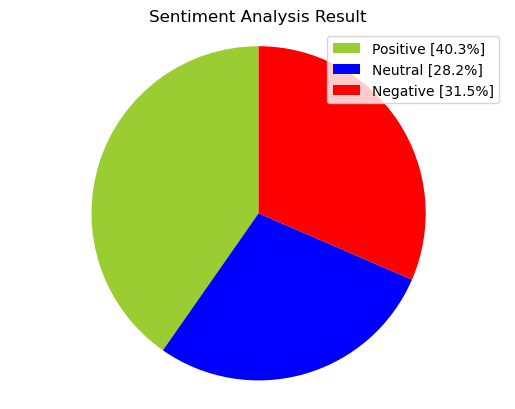

In [14]:
# Creating Pie Chart for representing polarity as proportions for the collected tweets

# legend details 
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']

patches, texts = plt.pie(sizes,colors=colors, startangle=90)

plt.style.use('default')
plt.legend(labels)

plt.title("Sentiment Analysis Result")
plt.axis('equal')
plt.show()

In [15]:
tweet_list[0]

0       b"@AlexandrosMarinos makes a lawyerly point he...
1       b"@TESLA_k1 @bscwhalegems @Companion_to I'm su...
2       b'@ananavarro These \xe2\x80\x9cPawns\xe2\x80\...
3       b'RT @seandilleyNEWS: A man on a bike just SNA...
4                 b'@spectatorindex Closer to real value'
                              ...                        
4995    b'RT @jstrokums: Ready for some warm weather h...
4996    b'Apparently it snowed last night, and it\xe2\...
4997    b"@ViralNewsNYC @KathyHochul Too bad there was...
4998        b'@DashDobrofsky Beto had and has no chances'
4999    b'RT @SkyNews: Buffalo Bills players and staff...
Name: 0, Length: 5000, dtype: object

In [16]:
# Let's check some tweets sentiments 
print(tweet_list.iloc[0])
print(sentiment_analyzer.polarity_scores(str(tweet_list.iloc[5])))

0    b"@AlexandrosMarinos makes a lawyerly point he...
Name: 0, dtype: object
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Tweets Preprocessing - Cleaning Collected Tweets

In [17]:
print(tweet_list.info())
print(tweet_list.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB
None
                                                        0
count                                                5000
unique                                               4040
top     b'RT @BrianGitt: Cold weather reduces electric...
freq                                                  120


In [18]:
# Let's remove duplicates, as it's clear above that there are about 75 dupicated records

tweet_list.drop_duplicates(inplace = True)
tweet_list.describe()

,0
count,4040
unique,4040
top,b'It\xe2\x80\x99s the \xe2\x80\x9cbe in bed an...
freq,1


In [19]:
# Cleaning steps 

lm = WordNetLemmatizer()
ps = PorterStemmer()

def twt_clean(text):
    
    # Remove the "RT" at tweets which stands for the retweet
  text = re.sub('RT @\w+: ',' ',text)

    # lowers the text --> no capitalization
  text = str(text).lower()

    # Remove urls
  text = re.sub(r'https?://\S+|www\.\S+',' ',text)

    # Remove all sepcial characters except for emojis because they are important in Setiment Analysis
  text = re.sub('[^a-z_#@\s\U00010000-\U0010ffff]', ' ',text) 

  text_list = text.split()
    
    # Applying lemmatizers and stop words removal 
  text_list =  [lm.lemmatize(word) for word in text_list if not word in set(stopwords.words('english')) and len(word) > 1 ]
  text = ' '.join(text_list)
    
  return text

In [20]:
# Applying the cleaning function to all tweets

tweet_list_cln= []
for it in list(tweet_list[0]):
    text = twt_clean(it.decode('utf-8'))
    tweet_list_cln.append(text)

In [21]:
# Creating a new dataframe which contains all details
tw_list = tweet_list.copy()
tw_list['text'] = tweet_list_cln

for index, row in tw_list['text'].iteritems():
    
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']

 if neg > pos:
  tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
  tw_list.loc[index, 'sentiment'] = "positive"
 else:
  tw_list.loc[index, 'sentiment'] = "neutral"

 tw_list.loc[index, 'neg'] = neg
 tw_list.loc[index, 'neu'] = neu
 tw_list.loc[index, 'pos'] = pos
 tw_list.loc[index, 'compound'] = comp

tw_list.head()

,0,text,sentiment,neg,neu,pos,compound
0,"b""@AlexandrosMarinos makes a lawyerly point he...",@alexandrosmarinos make lawyerly point investi...,negative,0.157,0.843,0.000,-0.3818
1,"b""@TESLA_k1 @bscwhalegems @Companion_to I'm su...",@tesla_k @bscwhalegems @companion_to surprised...,positive,0.000,0.881,0.119,0.2263
2,b'@ananavarro These \xe2\x80\x9cPawns\xe2\x80\...,@ananavarro pawn already moved team two space ...,negative,0.111,0.889,0.000,-0.4588
3,b'RT @seandilleyNEWS: A man on a bike just SNA...,man bike snatched stole iphone hand wrong blin...,negative,0.366,0.370,0.263,-0.3612
4,b'@spectatorindex Closer to real value',@spectatorindex closer real value,positive,0.000,0.556,0.444,0.3400


In [22]:
# Creating separate dataframes for each sentiment (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

# Creating Word Clouds for Tweets

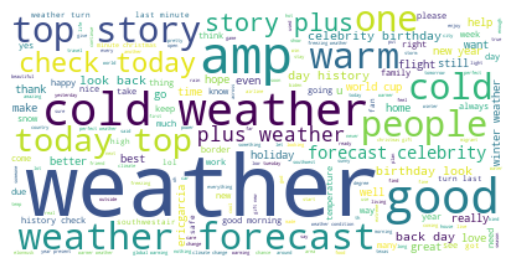

In [24]:
# Creating word cloud for positive sentiments

text = " ".join(review for review in tw_list_positive.text)
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

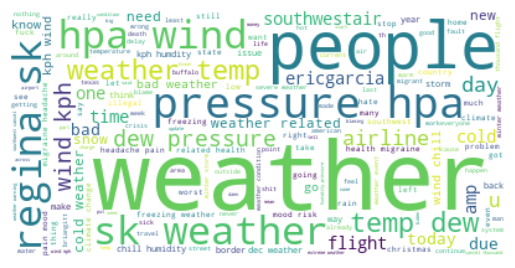

In [25]:
# Creating word cloud for negative sentiment
text = " ".join(review for review in tw_list_negative.text)
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()